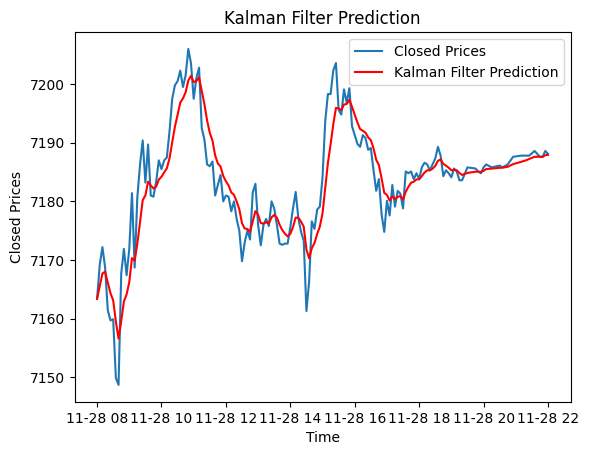

Variance of Prediction Errors: 16.425541319496602


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Charger les données depuis le fichier JSON
file_path = 'data5min/2024-11-28.json'
df = pd.read_json(file_path)

# Assurer que la colonne 'SnapshotTime' est en format datetime
df['SnapshotTime'] = pd.to_datetime(df['SnapshotTime'])

# Utiliser 'SnapshotTime' comme index
df.set_index('SnapshotTime', inplace=True)

# Extraire les prix de clôture
closed_prices = df['closedprices'].values

# Définir le modèle de transition et le modèle d'observation
transition_matrix = [[1]]  # Modèle de transition simple
observation_matrix = [[1]]  # Modèle d'observation simple

# Initialiser les états et les covariances
initial_state_mean = [closed_prices[0]]
initial_state_covariance = [[1]]

# Définir les covariances de transition et d'observation
transition_covariance = [[0.1]]  # Incertitude du modèle de transition
observation_covariance = [[1]]  # Incertitude du modèle d'observation

# Créer le filtre de Kalman
kf = KalmanFilter(
    transition_matrices=transition_matrix,
    observation_matrices=observation_matrix,
    initial_state_mean=initial_state_mean,
    initial_state_covariance=initial_state_covariance,
    transition_covariance=transition_covariance,
    observation_covariance=observation_covariance
)

# Appliquer le filtre de Kalman
state_means, state_covariances = kf.filter(closed_prices)

# Tracer les résultats
plt.plot(df.index, closed_prices, label='Closed Prices')
plt.plot(df.index, state_means, label='Kalman Filter Prediction', color='red')
plt.xlabel('Time')
plt.ylabel('Closed Prices')
plt.title('Kalman Filter Prediction')
plt.legend()
plt.show()

# Calculer les erreurs de prédiction
prediction_errors = closed_prices - state_means.flatten()

# Calculer la variance des erreurs de prédiction
variance_prediction_errors = np.var(prediction_errors)

print(f"Variance of Prediction Errors: {variance_prediction_errors}")

predict next observation

Predicted next observation: 7182.7230239566115


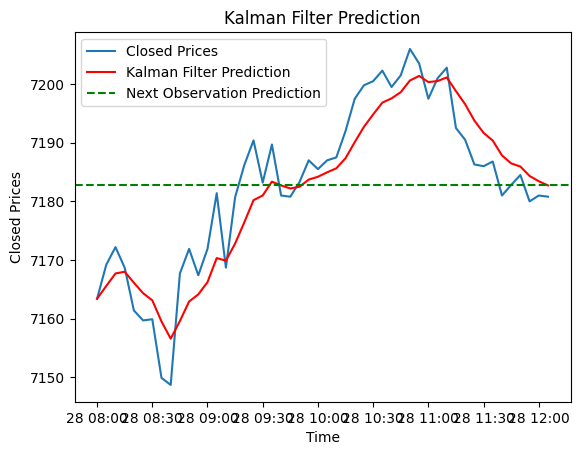

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Charger les données depuis le fichier JSON
file_path = 'data5min/2024-11-28.json'
df = pd.read_json(file_path)

# Assurer que la colonne 'SnapshotTime' est en format datetime
df['SnapshotTime'] = pd.to_datetime(df['SnapshotTime'])

# take first 100 rows
df = df.head(50)
# Utiliser 'SnapshotTime' comme index
df.set_index('SnapshotTime', inplace=True)

# Extraire les prix de clôture
closed_prices = df['closedprices'].values

# Définir le modèle de transition et le modèle d'observation
transition_matrix = [[1]]  # Modèle de transition simple
observation_matrix = [[1]]  # Modèle d'observation simple

# Initialiser les états et les covariances
initial_state_mean = [closed_prices[0]]
initial_state_covariance = [[1]]

# Définir les covariances de transition et d'observation
transition_covariance = [[0.1]]  # Incertitude du modèle de transition
observation_covariance = [[1]]  # Incertitude du modèle d'observation

# Créer le filtre de Kalman
kf = KalmanFilter(
    transition_matrices=transition_matrix,
    observation_matrices=observation_matrix,
    initial_state_mean=initial_state_mean,
    initial_state_covariance=initial_state_covariance,
    transition_covariance=transition_covariance,
    observation_covariance=observation_covariance
)

# Appliquer le filtre de Kalman
state_means, state_covariances = kf.filter(closed_prices)

# Prédire la prochaine observation
next_state_mean, next_state_covariance = kf.filter_update(
    state_means[-1],
    state_covariances[-1]
)

# Afficher la prédiction de la prochaine observation
print(f"Predicted next observation: {next_state_mean[0]}")

# Tracer les résultats
plt.plot(df.index, closed_prices, label='Closed Prices')
plt.plot(df.index, state_means, label='Kalman Filter Prediction', color='red')
plt.axhline(y=next_state_mean[0], color='green', linestyle='--', label='Next Observation Prediction')
plt.xlabel('Time')
plt.ylabel('Closed Prices')
plt.title('Kalman Filter Prediction')
plt.legend()
plt.show()